<h1 align="center" style="color:blue">🧑‍💼 Exploratory Analysis: Employees' Annual Salary in Chicago 🧑‍💼</h1>

<p>Howdy 👋👋, in this notebook I made some Exploratory Analysis of my dataset 
    <a href="https://www.kaggle.com/datasets/dsfelix/employees-annual-salary-in-chicago">Employees' Annual Salary in Chicago</a>.</p>

<p>My goals in this analysis are:</p>

* Find out the 5 most paid workers;
* Find out the 5 less paid workers;
* Find out the 5 most paid job titles (avg);
* Find out the 5 less paid job titles (avg);
* Find out the avg Annual and Monthly Salary; (Salary/Mothly only)
* Create a Variable Correlation plot;
* Scatter Plot of the Relationship between thee Variables.

<p>I'm still a newbie in Data Science and I know that there are a huge other things that I can do in Exploratory Analysis, but I think this a good starter hehehe.</p>

<p>Share your thoughts about the notebook and the dataset, such as ways to improve, tips and other cool things I could be doing in the Analisis. It'll be so helpfull 😀😀</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Reading the dataset and getting a overview
original_df = pd.read_csv('../input/employees-annual-salary-in-chicago/salary.csv')
original_df

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,122568.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,110796.0,NaN
2,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,122112.0,NaN
3,"ABARCA, EMMANUEL",CONCRETE LABORER,TRANSPORTN,F,Hourly,40.0,NaN,45.9
4,"ABARCA, FRANCES J",POLICE OFFICER,POLICE,F,Salary,NaN,86730.0,NaN
...,...,...,...,...,...,...,...,...
31096,"ZYLINSKA, KLAUDIA",POLICE OFFICER,POLICE,F,Salary,NaN,90990.0,NaN
31097,"ZYMANTAS, LAURA C",POLICE OFFICER,POLICE,F,Salary,NaN,95586.0,NaN
31098,"ZYMANTAS, MARK E",POLICE OFFICER,POLICE,F,Salary,NaN,102372.0,NaN
31099,"ZYRKOWSKI, CARLO E",POLICE OFFICER,POLICE,F,Salary,NaN,109236.0,NaN


In order to make the analysis easier, let's split the dataset into two: <b>salary</b> and <b>hourly</b> one. To these two datasets, we will need the following columns:

* <b>Salary</b>: <i>name, job titles, department, full or part-time and annual salary;</i>
* <b>Hourly</b>: <i>name, job titles, department, full or part-time, typical hours and hourly rate.</i>

In [3]:
# Creating the Salary DataFrame and dropping the unuseful columns

salary_df = original_df.loc[original_df['Salary or Hourly'] == 'Salary'].copy()
salary_df = salary_df.drop(salary_df.iloc[:, 4:6], axis=1)
salary_df = salary_df.drop(salary_df.iloc[:, 5:], axis=1)

print('Number of Employees: ', salary_df.shape[0])
salary_df.head()

Number of Employees:  24287


,Name,Job Titles,Department,Full or Part-Time,Annual Salary
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,122568.0
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,110796.0
2,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,122112.0
4,"ABARCA, FRANCES J",POLICE OFFICER,POLICE,F,86730.0
6,"ABBATEMARCO, JAMES J",FIRE ENGINEER-EMT,FIRE,F,118830.0


In [4]:
# Doing the same thing to the Hourly DataFrame

hourly_df = original_df.loc[original_df['Salary or Hourly'] == 'Hourly'].copy()
hourly_df = hourly_df.drop(hourly_df.iloc[:, 4:5], axis=1)
hourly_df = hourly_df.drop(hourly_df.iloc[:, 5:6], axis=1)

print('Number of Employees: ', hourly_df.shape[0])
hourly_df.head()

Number of Employees:  6814


,Name,Job Titles,Department,Full or Part-Time,Typical Hours,Hourly Rate
3,"ABARCA, EMMANUEL",CONCRETE LABORER,TRANSPORTN,F,40.0,45.90
5,"ABBATACOLA, ROBERT J",ELECTRICAL MECHANIC,AVIATION,F,40.0,51.00
8,"ABBOTT, BETTY L",FOSTER GRANDPARENT,FAMILY & SUPPORT,P,20.0,3.00
20,"ABDUL-SHAKUR, TAHIR J",POOL MOTOR TRUCK DRIVER,STREETS & SAN,P,10.0,39.25
36,"ABRAMS, SAMUEL A",POOL MOTOR TRUCK DRIVER,STREETS & SAN,F,40.0,39.25


----

<h1 style="color:blue">0) Salary/Monthly Employees</h1>

<p></p>

<b>Getting the 5 most and less paid employees</b>

In [5]:
# checkgin out whether we are dealing with any null datas
# spoiler: hopefully, we are not!!!!
salary_df.isnull().sum()

Name                 0
Job Titles           0
Department           0
Full or Part-Time    0
Annual Salary        0
dtype: int64

In [6]:
# sorting the rows by 'Annual Salary' column in ascending and descending order
# and get the top five of them
five_most_paid = salary_df.sort_values('Annual Salary', ascending=False)[0:5]
five_most_paid = five_most_paid.set_index(pd.Index([0, 1, 2, 3, 4]))

five_less_paid = salary_df.sort_values('Annual Salary', ascending=True)[0:5]
five_less_paid = five_less_paid.set_index(pd.Index([0, 1, 2, 3, 4]))

In [7]:
### Five Most Paid ###
five_most_paid_title = '* Five Most Paid Employes *'

print('*' * len(five_most_paid_title))
print(five_most_paid_title)
print('*' * len(five_most_paid_title))

for top_position in range(len(five_most_paid)):
    print()
    print('Top #', top_position + 1)
    print('----')
    print('Name: ', five_most_paid.at[top_position, 'Name'])
    print('Job Title: ', five_most_paid.at[top_position, 'Job Titles'])
    print('Department: ', five_most_paid.at[top_position, 'Department'])
    
    print('Type of Time: ', 'Full-Time' \
          if five_most_paid.at[top_position, 'Full or Part-Time'] == 'F' \
          else 'Part-Time')
    
    print('Annual Salary: U$', five_most_paid.at[top_position, 'Annual Salary'])
    print('Monthly Salary: U$', round(five_most_paid.at[top_position, 'Annual Salary'] / 12, 2))

***************************
* Five Most Paid Employes *
***************************

Top # 1
----
Name:  RHEE,  JAMIE L
Job Title:  COMMISSIONER OF AVIATION
Department:  AVIATION
Type of Time:  Full-Time
Annual Salary: U$ 275004.0
Monthly Salary: U$ 22917.0

Top # 2
----
Name:  BROWN,  DAVID O
Job Title:  SUPERINTENDENT OF POLICE
Department:  POLICE
Type of Time:  Full-Time
Annual Salary: U$ 260004.0
Monthly Salary: U$ 21667.0

Top # 3
----
Name:  NANCE HOLT,  ANNETTE M
Job Title:  FIRE COMMISSIONER
Department:  FIRE
Type of Time:  Full-Time
Annual Salary: U$ 228612.0
Monthly Salary: U$ 19051.0

Top # 4
----
Name:  LIGHTFOOT,  LORI E
Job Title:  MAYOR
Department:  MAYOR'S OFFICE
Type of Time:  Full-Time
Annual Salary: U$ 216210.0
Monthly Salary: U$ 18017.5

Top # 5
----
Name:  SHERIDAN,  MARY L
Job Title:  FIRST DEPUTY FIRE COMMISSIONER
Department:  FIRE
Type of Time:  Full-Time
Annual Salary: U$ 207624.0
Monthly Salary: U$ 17302.0


In [8]:
### Five Less Paid ###
five_less_paid_title = '* Five Less Paid Employees *'

print('*' * len(five_less_paid_title))
print(five_less_paid_title)
print('*' * len(five_less_paid_title))

for top_position in range(len(five_less_paid)):
    print()
    print('Top #', top_position + 1)
    print('----')
    print('Name: ', five_less_paid.at[top_position, 'Name'])
    print('Job Title: ', five_less_paid.at[top_position, 'Job Titles'])
    print('Department: ', five_less_paid.at[top_position, 'Department'])
    
    print('Type of Time: ', 'Full-Time' \
          if five_less_paid.at[top_position, 'Full or Part-Time'] == 'F' \
          else 'Part-Time')
    
    print('Annual Salary: U$', five_less_paid.at[top_position, 'Annual Salary'])
    print('Monthly Salary: U$', round(five_less_paid.at[top_position, 'Annual Salary'] / 12, 2))

****************************
* Five Less Paid Employees *
****************************

Top # 1
----
Name:  ADELMAN,  BRUCE E
Job Title:  LEGISLATIVE AIDE
Department:  CITY COUNCIL
Type of Time:  Full-Time
Annual Salary: U$ 21600.0
Monthly Salary: U$ 1800.0

Top # 2
----
Name:  BURKS,  BRITTANY S
Job Title:  ALDERMANIC AIDE
Department:  CITY COUNCIL
Type of Time:  Full-Time
Annual Salary: U$ 23208.0
Monthly Salary: U$ 1934.0

Top # 3
----
Name:  MARTIN,  CAROLINE J
Job Title:  ALDERMANIC AIDE
Department:  CITY COUNCIL
Type of Time:  Full-Time
Annual Salary: U$ 30000.0
Monthly Salary: U$ 2500.0

Top # 4
----
Name:  TOMPKINS,  ANGELA A
Job Title:  CLERK - BD OF ELECTIONS
Department:  BOARD OF ELECTION
Type of Time:  Full-Time
Annual Salary: U$ 30060.0
Monthly Salary: U$ 2505.0

Top # 5
----
Name:  WILSON,  KAHLIL M
Job Title:  CLERK - BD OF ELECTIONS
Department:  BOARD OF ELECTION
Type of Time:  Full-Time
Annual Salary: U$ 30060.0
Monthly Salary: U$ 2505.0


----

<b>Getting the 5 most and less paid Job Titles (avg)</b>

In [9]:
""" 
Getting the avg salary for each job title:

\ We first group the 'Annual Salary' column by each 'Job Titles' and, to don't have
a list of salaries, we get the 'sum()' of this aggregation;

\ After that, we divide each result of the aggregation by the amount of datas we have
in each Job Title in order to get the Annual Salary Average. Oh, and we round each result
to 2 decimal digits;

\ In the end, we sort the new dataframe in descending order (higher avg to lower avg)
"""

avg_salary_df = round(salary_df.groupby('Job Titles')['Annual Salary'].sum() \
                / salary_df.groupby('Job Titles')['Annual Salary'].count(), 2)

avg_salary_df = avg_salary_df.sort_values(ascending=False)

In [10]:
"""
Getting the five most and less paid Job Titles:

\ With the sorted dataset, we get the five most paid jobs (first top five >> head)
and the five less paid jobs (last top five >> tail)

\ After that, to use a new index sequence, we reset the dataframes indexes; e.g.:

    - Before indexes being reset
    
     2789 | Job 1 | Avg 1
     3210 | Job 2 | Avg 2
    12049 | Job 3 | Avg 3
    
    - After indexes being reset
    
    0 | Job 1 | Avg 1
    1 | Job 2 | Avg 2
    2 | Job 3 | Avg 3
    
"""
five_most_paid_job_titles = avg_salary_df.head()
five_less_paid_job_titles = avg_salary_df.tail()


five_most_paid_job_titles = five_most_paid_job_titles.reset_index()
five_less_paid_job_titles = five_less_paid_job_titles.reset_index()

In [11]:
### Five Most Paid Job Titles ###

five_most_paid_job_titles_title = '* Five Most Paid Job Titles *'

print('*' * len(five_most_paid_job_titles_title))
print(five_most_paid_job_titles_title)
print('*' * len(five_most_paid_job_titles_title))

for top_position in range(len(five_most_paid_job_titles)):
    print()
    print('Top #', top_position + 1)
    print('----')
    print('Job Title: ', five_most_paid_job_titles.at[top_position, 'Job Titles'])
    print('Annual Salary: U$', five_most_paid_job_titles.at[top_position, 'Annual Salary'])

*****************************
* Five Most Paid Job Titles *
*****************************

Top # 1
----
Job Title:  COMMISSIONER OF AVIATION
Annual Salary: U$ 275004.0

Top # 2
----
Job Title:  SUPERINTENDENT OF POLICE
Annual Salary: U$ 260004.0

Top # 3
----
Job Title:  FIRE COMMISSIONER
Annual Salary: U$ 228612.0

Top # 4
----
Job Title:  MAYOR
Annual Salary: U$ 216210.0

Top # 5
----
Job Title:  FIRST DEPUTY FIRE COMMISSIONER
Annual Salary: U$ 207624.0


In [12]:
### Five Less Paid Job Titles ###

five_less_paid_job_titles_title = '* Five Less Paid Job Titles *'

print('*' * len(five_less_paid_job_titles_title))
print(five_less_paid_job_titles_title)
print('*' * len(five_less_paid_job_titles_title))

for top_position in range(len(five_less_paid_job_titles)):
    print()
    print('Top #', top_position + 1)
    print('----')
    print('Job Title: ', five_less_paid_job_titles.at[top_position, 'Job Titles'])
    print('Annual Salary: U$', five_less_paid_job_titles.at[top_position, 'Annual Salary'])

*****************************
* Five Less Paid Job Titles *
*****************************

Top # 1
----
Job Title:  TRAFFIC ENFORCEMENT TECH
Annual Salary: U$ 39581.45

Top # 2
----
Job Title:  REPROGRAPHICS TECHNICIAN II
Annual Salary: U$ 37224.0

Top # 3
----
Job Title:  COMMITTEE SECRETARY
Annual Salary: U$ 34476.0

Top # 4
----
Job Title:  CLERK - BD OF ELECTIONS
Annual Salary: U$ 34384.62

Top # 5
----
Job Title:  ELECTION EQUIPMENT & SUPPLY SPEC I
Annual Salary: U$ 32460.0


----

<b>Getting the Average Annual Monthly Salary</b>

In [13]:
# we already have the average annual salary
avg_salary_df

Job Titles
COMMISSIONER OF AVIATION              275004.00
SUPERINTENDENT OF POLICE              260004.00
FIRE COMMISSIONER                     228612.00
MAYOR                                 216210.00
FIRST DEPUTY FIRE COMMISSIONER        207624.00
                                        ...    
TRAFFIC ENFORCEMENT TECH               39581.45
REPROGRAPHICS TECHNICIAN II            37224.00
COMMITTEE SECRETARY                    34476.00
CLERK - BD OF ELECTIONS                34384.62
ELECTION EQUIPMENT & SUPPLY SPEC I     32460.00
Name: Annual Salary, Length: 948, dtype: float64

In [14]:
# to get the average salary per month, we just have to divide the annual average
# by 12 months (oh, and round the result to two decimal digits)
round(avg_salary_df / 12, 2)

Job Titles
COMMISSIONER OF AVIATION              22917.00
SUPERINTENDENT OF POLICE              21667.00
FIRE COMMISSIONER                     19051.00
MAYOR                                 18017.50
FIRST DEPUTY FIRE COMMISSIONER        17302.00
                                        ...   
TRAFFIC ENFORCEMENT TECH               3298.45
REPROGRAPHICS TECHNICIAN II            3102.00
COMMITTEE SECRETARY                    2873.00
CLERK - BD OF ELECTIONS                2865.38
ELECTION EQUIPMENT & SUPPLY SPEC I     2705.00
Name: Annual Salary, Length: 948, dtype: float64

----

<b>Variable Correlation Plot</b>

In [15]:
"""
To the correlation, we don't need the 'Name' column, because the person's name
doesn't interfere in how much this person will gain per year.

Also, as far the correlation uses numbers only, we have to transform the
categorical variables into numbers before getting the plot. The categorical
variables that we need to transform are 'Job Titles', 'Department' and 'Full or
Part-Time' columns
"""

# Getting a new dataframe excluding the 'Name' column
corr_salary_df = salary_df.iloc[:, 1:]

# Ennumareting the Binary Cateegorical Variables ('Full or Part-Time' column)
#
# 'P' values transform into 0
# 'F' values transform into 1
corr_salary_df['Full or Part-Time'].replace(['P', 'F'], [0, 1], inplace=True)

# Ennumerating the 'Job Titles' column by index
job_titles = corr_salary_df['Job Titles'].unique()
job_titles_index = [index for index in range(len(job_titles))]

corr_salary_df['Job Titles'].replace(job_titles, job_titles_index, inplace=True)

# Ennumerating the 'Department' column by index
department = corr_salary_df['Department'].unique()
department_index = [index for index in range(len(department))]

corr_salary_df['Department'].replace(department, department_index, inplace=True)

In [16]:
# Checking oout the transformed correlation dataframe
corr_salary_df

,Job Titles,Department,Full or Part-Time,Annual Salary
0,0,0,1,122568.0
1,1,0,1,110796.0
2,2,1,1,122112.0
4,3,0,1,86730.0
6,4,2,1,118830.0
...,...,...,...,...
31096,3,0,1,90990.0
31097,3,0,1,95586.0
31098,3,0,1,102372.0
31099,3,0,1,109236.0


In [17]:
# How the 'Annual Salary' is the response variable
# we transform it into the index
corr_salary_df = corr_salary_df.set_index('Annual Salary')
corr_salary_df

,Job Titles,Department,Full or Part-Time
Annual Salary,,,
122568.0,0,0,1
110796.0,1,0,1
122112.0,2,1,1
86730.0,3,0,1
118830.0,4,2,1
...,...,...,...
90990.0,3,0,1
95586.0,3,0,1
102372.0,3,0,1


<AxesSubplot:ylabel='Annual Salary'>

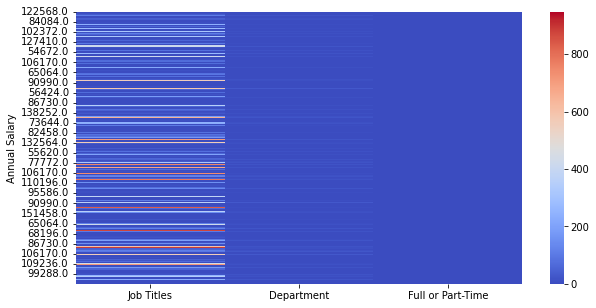

In [18]:
# Creating the heatmap plot
plt.figure(figsize=(10, 5))
sns.heatmap(corr_salary_df, cmap='coolwarm')

<b>With the heatmap aboce we can conclude:</b>

* Job Titles column has a considerable influence to the Annual Salary;
* Department column has a tiny influence;
* And Full or Part-Time columns doesn't have any influence.

----

<b>Relationship between the Variables</b>

In [19]:
colors = np.random.randn(len(corr_salary_df))

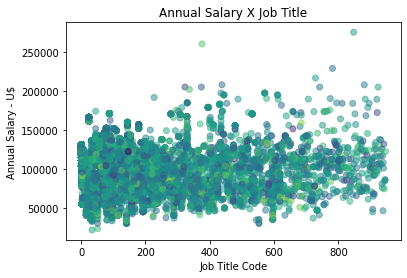

In [20]:
# Relationship between Annual Salary X Job Title

plt.scatter(corr_salary_df['Job Titles'], corr_salary_df.index, alpha=0.5, c=colors)

plt.xlabel('Job Title Code')
plt.ylabel('Annual Salary - U$')
plt.title('Annual Salary X Job Title')

plt.show()

<p>Realized that the avg annual salary in the Job Titles is around <b>U$ 100,000.00</b>, which means, the avg monthly salary is around <b>8,333.33 bucks</b>.</p>

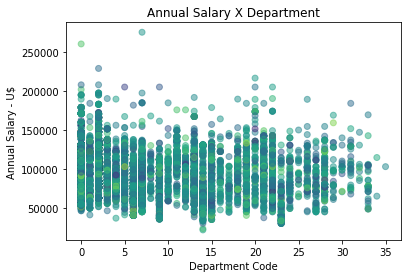

In [21]:
# Relationship between Annual Salary X Department

plt.scatter(corr_salary_df['Department'], corr_salary_df.index, alpha=0.5, c=colors)

plt.xlabel('Department Code')
plt.ylabel('Annual Salary - U$')
plt.title('Annual Salary X Department')

plt.show()

<p>We realized that there are employees that work at the same department but get different salary. It happens due to numerous reason, such as promotions, time of job at the company and education degree.</p>

----

<h1 style="color: blue">1 - Hourly Employees</h1>

<b>Getting the five most and less paid employees</b>

In [22]:
# First let's check out how many null values we have into 'hourly_df'

hourly_df.isnull().sum()

Name                 0
Job Titles           0
Department           0
Full or Part-Time    0
Typical Hours        0
Hourly Rate          0
dtype: int64

In [23]:
# sorting the rows by 'Hourly Rate' column in ascending and descending order
# and get the top five of them
five_most_paid = hourly_df.sort_values('Hourly Rate', ascending=False)[0:5]
five_most_paid = five_most_paid.set_index(pd.Index([0, 1, 2, 3, 4]))

five_less_paid = hourly_df.sort_values('Hourly Rate', ascending=True)[0:5]
five_less_paid = five_less_paid.set_index(pd.Index([0, 1, 2, 3, 4]))

In [24]:
### Five Most Paid ###
five_most_paid_title = '* Five Most Paid Employes *'

print('*' * len(five_most_paid_title))
print(five_most_paid_title)
print('*' * len(five_most_paid_title))

for top_position in range(len(five_most_paid)):
    print()
    print('Top #', top_position + 1)
    print('----')
    print('Name: ', five_most_paid.at[top_position, 'Name'])
    print('Job Title: ', five_most_paid.at[top_position, 'Job Titles'])
    print('Department: ', five_most_paid.at[top_position, 'Department'])
    
    print('Type of Time: ', 'Full-Time' \
          if five_most_paid.at[top_position, 'Full or Part-Time'] == 'F' \
          else 'Part-Time')
    
    print('Typical Hours: ', five_most_paid.at[top_position, 'Typical Hours'], ' hours')
    print('Hourly Rate: U$', five_most_paid.at[top_position, 'Hourly Rate'])

***************************
* Five Most Paid Employes *
***************************

Top # 1
----
Name:  RAO,  ANITA
Job Title:  PSYCHIATRIST
Department:  HEALTH
Type of Time:  Full-Time
Typical Hours:  35.0  hours
Hourly Rate: U$ 134.4

Top # 2
----
Name:  JONES,  JOHN W
Job Title:  PSYCHIATRIST
Department:  HEALTH
Type of Time:  Full-Time
Typical Hours:  35.0  hours
Hourly Rate: U$ 134.4

Top # 3
----
Name:  RUFFIN,  LARITA A
Job Title:  PARKING ENFORCEMENT AIDE
Department:  FINANCE
Type of Time:  Part-Time
Typical Hours:  20.0  hours
Hourly Rate: U$ 128.97

Top # 4
----
Name:  JILEK,  GEORGE J
Job Title:  DENTIST
Department:  HEALTH
Type of Time:  Full-Time
Typical Hours:  35.0  hours
Hourly Rate: U$ 64.3

Top # 5
----
Name:  HUGHES,  THOMAS J
Job Title:  FOREMAN OF LINEMEN
Department:  TRANSPORTN
Type of Time:  Full-Time
Typical Hours:  40.0  hours
Hourly Rate: U$ 62.05


In [25]:
### Five Less Paid ###
five_less_paid_title = '* Five Less Paid Employes *'

print('*' * len(five_less_paid_title))
print(five_less_paid_title)
print('*' * len(five_less_paid_title))

for top_position in range(len(five_less_paid)):
    print()
    print('Top #', top_position + 1)
    print('----')
    print('Name: ', five_less_paid.at[top_position, 'Name'])
    print('Job Title: ', five_less_paid.at[top_position, 'Job Titles'])
    print('Department: ', five_less_paid.at[top_position, 'Department'])
    
    print('Type of Time: ', 'Full-Time' \
          if five_less_paid.at[top_position, 'Full or Part-Time'] == 'F' \
          else 'Part-Time')
    
    print('Typical Hours: ', five_less_paid.at[top_position, 'Typical Hours'], ' hours')
    print('Hourly Rate: U$', five_less_paid.at[top_position, 'Hourly Rate'])

***************************
* Five Less Paid Employes *
***************************

Top # 1
----
Name:  FELKER,  CAROLYN
Job Title:  SENIOR COMPANION
Department:  FAMILY & SUPPORT
Type of Time:  Part-Time
Typical Hours:  20.0  hours
Hourly Rate: U$ 3.0

Top # 2
----
Name:  GAILES,  RITA
Job Title:  FOSTER GRANDPARENT
Department:  FAMILY & SUPPORT
Type of Time:  Part-Time
Typical Hours:  20.0  hours
Hourly Rate: U$ 3.0

Top # 3
----
Name:  WILLIAMS,  BRENDA
Job Title:  FOSTER GRANDPARENT
Department:  FAMILY & SUPPORT
Type of Time:  Part-Time
Typical Hours:  20.0  hours
Hourly Rate: U$ 3.0

Top # 4
----
Name:  MCGEE,  ARIE
Job Title:  SENIOR COMPANION
Department:  FAMILY & SUPPORT
Type of Time:  Part-Time
Typical Hours:  20.0  hours
Hourly Rate: U$ 3.0

Top # 5
----
Name:  STEWART,  BARBARA
Job Title:  SENIOR COMPANION
Department:  FAMILY & SUPPORT
Type of Time:  Part-Time
Typical Hours:  20.0  hours
Hourly Rate: U$ 3.0


----

<b>Getting the five most and less paid Job Titles (avg)</b>

In [26]:
""" 
Getting the avg salary for each job title:

\ We first group the 'Hourly Rate' column by each 'Job Titles' and, to don't have
a list of salaries, we get the 'sum()' of this aggregation;

\ After that, we divide each result of the aggregation by the amount of datas we have
in each Job Title in order to get the Hoourly Rate Average. Oh, and we round each result
to 2 decimal digits;

\ In the end, we sort the new dataframe in descending order (higher avg to lower avg)
"""

avg_hourly_df = round(hourly_df.groupby('Job Titles')['Hourly Rate'].sum() \
                / hourly_df.groupby('Job Titles')['Hourly Rate'].count(), 2)

avg_hourly_df = avg_hourly_df.sort_values(ascending=False)

In [27]:
avg_hourly_df

Job Titles
PSYCHIATRIST                    134.40
PARKING ENFORCEMENT AIDE        128.97
DENTIST                          64.30
FOREMAN OF LINEMEN               62.05
ASST CORPORATION COUNSEL III     59.47
                                 ...  
HOSPITALITY WORKER               15.00
LIBRARY PAGE                     15.00
LAW CLERK                        15.00
FOSTER GRANDPARENT                3.00
SENIOR COMPANION                  3.00
Name: Hourly Rate, Length: 136, dtype: float64

In [28]:
"""
Getting the five most and less paid Job Titles:

\ With the sorted dataset, we get the five most paid jobs (first top five >> head)
and the five less paid jobs (last top five >> tail)

\ After that, to use a new index sequence, we reset the dataframes indexes; e.g.:

    - Before indexes being reset
    
     2789 | Job 1 | Avg 1
     3210 | Job 2 | Avg 2
    12049 | Job 3 | Avg 3
    
    - After indexes being reset
    
    0 | Job 1 | Avg 1
    1 | Job 2 | Avg 2
    2 | Job 3 | Avg 3
    
"""
five_most_paid_job_titles = avg_hourly_df.head()
five_less_paid_job_titles = avg_hourly_df.tail()


five_most_paid_job_titles = five_most_paid_job_titles.reset_index()
five_less_paid_job_titles = five_less_paid_job_titles.reset_index()

In [29]:
### Five Most Paid Job Titles ###

five_most_paid_job_titles_title = '* Five Most Paid Job Titles *'

print('*' * len(five_most_paid_job_titles_title))
print(five_most_paid_job_titles_title)
print('*' * len(five_most_paid_job_titles_title))

for top_position in range(len(five_most_paid_job_titles)):
    print()
    print('Top #', top_position + 1)
    print('----')
    print('Job Title: ', five_most_paid_job_titles.at[top_position, 'Job Titles'])
    print('Hourly Rate: U$', five_most_paid_job_titles.at[top_position, 'Hourly Rate'])

*****************************
* Five Most Paid Job Titles *
*****************************

Top # 1
----
Job Title:  PSYCHIATRIST
Hourly Rate: U$ 134.4

Top # 2
----
Job Title:  PARKING ENFORCEMENT AIDE
Hourly Rate: U$ 128.97

Top # 3
----
Job Title:  DENTIST
Hourly Rate: U$ 64.3

Top # 4
----
Job Title:  FOREMAN OF LINEMEN
Hourly Rate: U$ 62.05

Top # 5
----
Job Title:  ASST CORPORATION COUNSEL III
Hourly Rate: U$ 59.47


In [30]:
### Five Less Paid Job Titles ###

five_less_paid_job_titles_title = '* Five Less Paid Job Titles *'

print('*' * len(five_less_paid_job_titles_title))
print(five_less_paid_job_titles_title)
print('*' * len(five_less_paid_job_titles_title))

for top_position in range(len(five_less_paid_job_titles)):
    print()
    print('Top #', top_position + 1)
    print('----')
    print('Job Title: ', five_less_paid_job_titles.at[top_position, 'Job Titles'])
    print('Hourly Rate: U$', five_less_paid_job_titles.at[top_position, 'Hourly Rate'])

*****************************
* Five Less Paid Job Titles *
*****************************

Top # 1
----
Job Title:  HOSPITALITY WORKER
Hourly Rate: U$ 15.0

Top # 2
----
Job Title:  LIBRARY PAGE
Hourly Rate: U$ 15.0

Top # 3
----
Job Title:  LAW CLERK
Hourly Rate: U$ 15.0

Top # 4
----
Job Title:  FOSTER GRANDPARENT
Hourly Rate: U$ 3.0

Top # 5
----
Job Title:  SENIOR COMPANION
Hourly Rate: U$ 3.0


In [31]:
five_less_paid_job_titles

,Job Titles,Hourly Rate
0,HOSPITALITY WORKER,15.0
1,LIBRARY PAGE,15.0
2,LAW CLERK,15.0
3,FOSTER GRANDPARENT,3.0
4,SENIOR COMPANION,3.0


----

<b>Variable Correlation Plot</b>

In [32]:
"""
To the correlation, we don't need the 'Name' column, because the person's name
doesn't interfere in how much this person will gain per year.

Also, as far the correlation uses numbers only, we have to transform the
categorical variables into numbers before getting the plot. The categorical
variables that we need to transform are 'Job Titles', 'Department' and 'Full or
Part-Time' columns
"""

# Getting a new dataframe excluding the 'Name' column
corr_hourly_df = hourly_df.iloc[:, 1:]

# Ennumareting the Binary Categorical Variables ('Full or Part-Time' column)
#
# 'P' values transform into 0
# 'F' values transform into 1
corr_hourly_df['Full or Part-Time'].replace(['P', 'F'], [0, 1], inplace=True)

# Enumerating the 'Job Titles' column by index
job_titles = corr_hourly_df['Job Titles'].unique()
job_titles_index = [index for index in range(len(job_titles))]

corr_hourly_df['Job Titles'].replace(job_titles, job_titles_index, inplace=True)

# Enumerating the 'Department' column by index
department = corr_hourly_df['Department'].unique()
department_index = [index for index in range(len(department))]

corr_hourly_df['Department'].replace(department, department_index, inplace=True)

In [33]:
# Checking oout the transformed correlation dataframe
corr_hourly_df

,Job Titles,Department,Full or Part-Time,Typical Hours,Hourly Rate
3,0,0,1,40.0,45.90
5,1,1,1,40.0,51.00
8,2,2,0,20.0,3.00
20,3,3,0,10.0,39.25
36,3,3,1,40.0,39.25
...,...,...,...,...,...
31077,15,7,1,40.0,45.90
31080,23,8,0,20.0,25.00
31081,68,4,1,40.0,53.18
31084,1,11,1,40.0,51.00


In [34]:
# How the 'Hourly Rate' is the response variable
# we transform it into the index
corr_hourly_df = corr_hourly_df.set_index('Hourly Rate')
corr_hourly_df

,Job Titles,Department,Full or Part-Time,Typical Hours
Hourly Rate,,,,
45.90,0,0,1,40.0
51.00,1,1,1,40.0
3.00,2,2,0,20.0
39.25,3,3,0,10.0
39.25,3,3,1,40.0
...,...,...,...,...
45.90,15,7,1,40.0
25.00,23,8,0,20.0
53.18,68,4,1,40.0


<AxesSubplot:ylabel='Hourly Rate'>

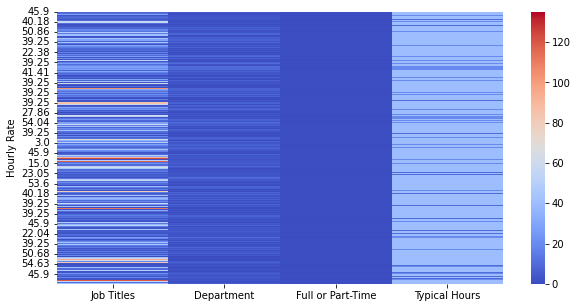

In [35]:
# Creating the heatmap plot
plt.figure(figsize=(10, 5))
sns.heatmap(corr_hourly_df, cmap='coolwarm')

With the heatmap aboce we can conclude:

* Job Titles column has a considerable influence to the Hourly Rate;
* Department column has a tiny influence;
* Full or Part-Time columns doesn't have any influence;
* Typical Hours column has a considerable influence to the Hourly Rate, but less than the Job Titles one

----

<b>Relationship between the Variables</b>

In [36]:
colors = np.random.randn(len(corr_hourly_df))

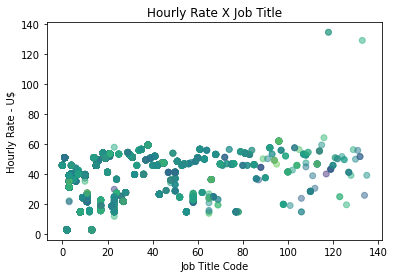

In [37]:
# Relationship between Hourly Rate X Job Title

plt.scatter(corr_hourly_df['Job Titles'], corr_hourly_df.index, alpha=0.5, c=colors)

plt.xlabel('Job Title Code')
plt.ylabel('Hourly Rate - U$')
plt.title('Hourly Rate X Job Title')

plt.show()

<p>The avg hourly rate is around <b>U$ 40.00</b>, and the two employees that earn around 130~140 dollars could be treated as outliers, but how the datas are real (the two employees and the salary are real two), they aree not ignored in the dataset.</p>

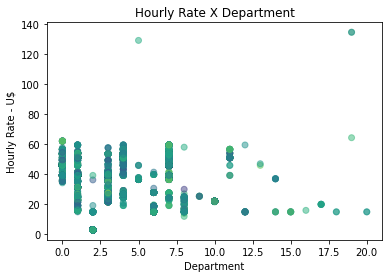

In [38]:
# Relationship between Hourly Rate X Department

plt.scatter(corr_hourly_df['Department'], corr_hourly_df.index, alpha=0.5, c=colors)

plt.xlabel('Department')
plt.ylabel('Hourly Rate - U$')
plt.title('Hourly Rate X Department')

plt.show()

<p>This is the same situation at the Annual Salary: we have employees working at the same department, but with different salary values.</p>

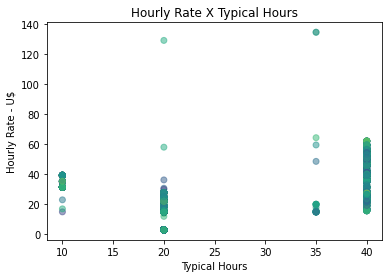

In [39]:
# Relationship between Hourly Rate X Typical Hours

plt.scatter(corr_hourly_df['Typical Hours'], corr_hourly_df.index, alpha=0.5, c=colors)

plt.xlabel('Typical Hours')
plt.ylabel('Hourly Rate - U$')
plt.title('Hourly Rate X Typical Hours')

plt.show()

<p>With this plot, we can assume that the most employees work around <b>40 hours</b> per week.</p>

----

<h1 style="color:blue">2 - Saving the Processed Data</h1>

In order to don't have the need to process the datas every time we need to get the coorrelatioon of thee datas, let's save the dataframes `corr_salary_df` and `corr_hourly_df` in two different csv files.

But before, how the `Full or Part-Time` column doesn't have influence to the `Annual Salary` and `Hourly Rate` variables, let's drop out this column  from both datasets.

In [40]:
# Dropping out 'Full or Part-Time' column from thee correlation datasets

corr_salary_df = corr_salary_df.iloc[:, 0:2]
corr_hourly_df = corr_hourly_df.drop(corr_hourly_df.iloc[:, 2:3], axis=1)

In [41]:
# Saving the two datasets into two csv files

corr_salary_df.to_csv('Transformed Monthly Salary.csv')
corr_hourly_df.to_csv('Transformed Hourly Salary.csv')

----

<h2 style="color:blue">Wrapping up</h2>

Pheww, what a job!!! This is the end of the notebook. In the next one I will create a report to summarize everything we learned analysing this dataset and after that we will create two machine learning algorithms:

* one to predict the Annual Salary for Monthly/Salary employees
* another one to predict the Hourly Rate for Hourly employees

See ya!! 👋👋

----

<br>

<i>Next Notebook:</i> <a href="https://www.kaggle.com/code/dsfelix/2-2-employees-annual-salary-chicago-report">2/2 Employees' Annual Salary Chicago Report</a>